In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

autos = pd.read_csv('./data/autos.csv', encoding='latin-1')
autos.head()

import re
regex = re.compile('.*toyota.*corolla.*', re.IGNORECASE)
filter1 = autos['name'].apply(lambda x: bool(regex.search(x)))
filter2 = autos['price']<12000
filter3 = autos['yearOfRegistration']>=1990
tc = autos[filter1 & filter2 & filter3]

import re
regex = re.compile('.*Audi.*a4.*', re.IGNORECASE)
filter1 = autos['name'].apply(lambda x: bool(regex.search(x)))
filter2 = autos['price']<12000
filter3 = autos['yearOfRegistration']>=1990
audi = autos[filter1 & filter2 & filter3]

In [2]:
audi.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
103,2016-03-15 17:41:31,Audi_A4_B5_1_6_Liter,privat,Angebot,499,control,limousine,1995,manuell,101,a4,150000,5,benzin,audi,NaN,2016-03-15 00:00:00,0,85414,2016-03-22 20:48:22
105,2016-04-01 09:54:39,Audi_a4_2.5_TDI_Tausch_moeglich,privat,Angebot,6500,test,limousine,2004,manuell,163,a4,150000,4,diesel,audi,NaN,2016-04-01 00:00:00,0,97450,2016-04-01 09:54:39
147,2016-03-14 12:46:46,Audi_A4_b5_Avant_TÜV_10/17,privat,Angebot,1500,test,kombi,1996,manuell,126,a4,150000,0,NaN,audi,nein,2016-03-14 00:00:00,0,24873,2016-03-17 00:45:29
316,2016-03-19 10:54:59,Audi_A4_Cabriolet_3.0,privat,Angebot,5299,test,cabrio,2002,manuell,220,a4,150000,4,benzin,audi,nein,2016-03-19 00:00:00,0,80999,2016-04-02 14:46:07
408,2016-03-20 23:45:11,Audi_A4_1.8,privat,Angebot,2700,control,limousine,1999,manuell,125,a4,125000,7,benzin,audi,nein,2016-03-20 00:00:00,0,57072,2016-04-07 09:45:41


In [3]:
tc.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
861,2016-03-07 13:46:32,Toyota_Corolla_1.6_Combi_Sol,privat,Angebot,1800,control,kombi,2003,manuell,110,corolla,150000,6,benzin,toyota,ja,2016-03-07 00:00:00,0,53347,2016-03-10 10:46:17
912,2016-03-27 23:53:18,Toyota_Corolla_Verso_2.2_D_CAT_DPF_Executive,privat,Angebot,5300,test,bus,2008,manuell,177,verso,150000,1,diesel,toyota,nein,2016-03-27 00:00:00,0,63128,2016-04-06 09:15:32
1898,2016-03-22 20:52:00,Toyota_Corolla,privat,Angebot,3200,control,kleinwagen,2004,manuell,1398,corolla,5000,6,benzin,toyota,nein,2016-03-22 00:00:00,0,22043,2016-03-22 21:43:26
2264,2016-03-12 23:47:09,Toyota_Corolla_1.6_VVT_i_Combi_Sol,privat,Angebot,2990,control,kombi,2004,manuell,110,corolla,150000,8,benzin,toyota,nein,2016-03-12 00:00:00,0,16540,2016-03-31 06:47:04
2386,2016-03-10 14:48:16,Toyota_Corolla_Verso_2.2_D_CAT_Sol,privat,Angebot,5900,test,bus,2006,manuell,177,verso,150000,8,diesel,toyota,nein,2016-03-10 00:00:00,0,57072,2016-03-14 11:45:36


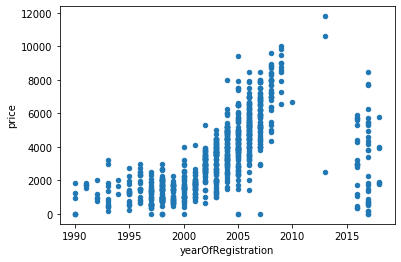

In [4]:
tc.plot(kind='scatter', x='yearOfRegistration',y='price')

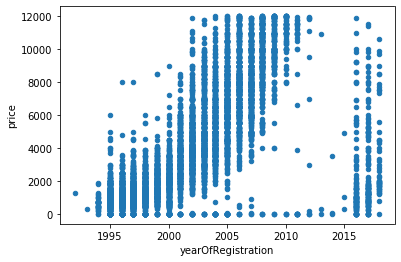

In [5]:
audi.plot(kind='scatter', x='yearOfRegistration',y='price')

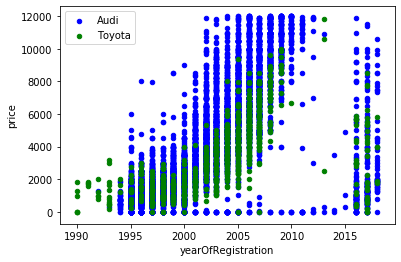

In [6]:
ax = audi.plot.scatter(x='yearOfRegistration',y='price', color='Blue', label='Audi')
tc.plot.scatter(x='yearOfRegistration',y='price', color='Green', label='Toyota', ax=ax)

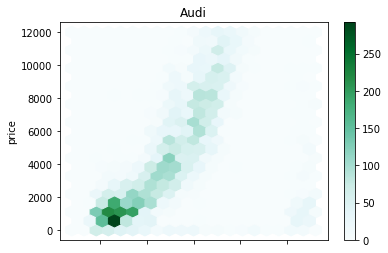

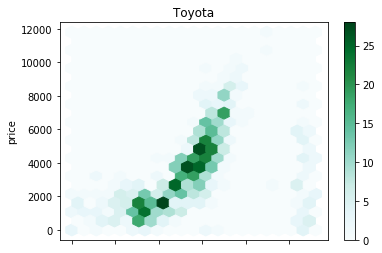

In [8]:
audi.plot.hexbin(x='yearOfRegistration',y='price', gridsize=20, title='Audi')
tc.plot.hexbin(x='yearOfRegistration',y='price', gridsize=20, title='Toyota')

In [9]:
tc_counts = tc['yearOfRegistration'].value_counts().sort_index()
audi_counts = audi['yearOfRegistration'].value_counts().sort_index()

In [10]:
car_counts = pd.DataFrame(index = tc_counts.index.append(audi_counts.index).unique())

In [11]:
car_counts['Toyota'] = tc_counts

In [12]:
car_counts['Audi'] = audi_counts

In [13]:
car_counts.fillna(0,inplace=True)

In [14]:
car_counts.sort_index(inplace=True)

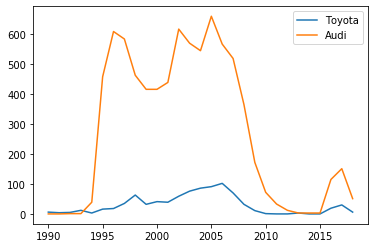

In [15]:
car_counts.plot()

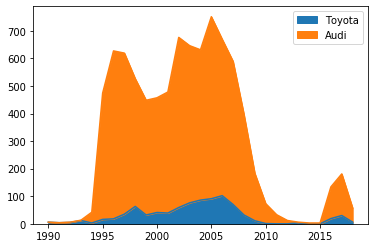

In [16]:
car_counts.plot(kind='area')